<a href="https://colab.research.google.com/github/timothyafolami/text-classification-weight-and-bias/blob/main/Building_and_Optimizing_a_Text_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing some libraries

In [ ]:
!pip install -q nltk
!pip install -q wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.1 MB/s eta 0:00:00


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Loading and Exploring the Data

### Data Source:
https://www.kaggle.com/datasets/tanishqdublish/text-classification-documentation/data


In [ ]:
df = pd.read_csv('df_file.csv')
df

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0
...,...,...
2220,India opens skies to competition\n \n India wi...,4
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...,4
2222,Survey confirms property slowdown\n \n Governm...,4
2223,High fuel prices hit BA's profits\n \n British...,4


In [ ]:
# checking the shape of the data
df.shape

(2225, 2)

In [ ]:
# Checking the unique values in the Label column (Target variable)
df['Label'].unique()

array([0, 1, 2, 3, 4])

In [ ]:
# counting the unique values in the Label column (Target variable)
df['Label'].value_counts()

1    511
4    510
0    417
2    401
3    386
Name: Label, dtype: int64

We have 5 classes in this case.

In [ ]:
# Viewing two texts in each class

# The uniqur classes
uniques = df['Label'].unique()

# iterating to get the texts.
for label in uniques:
  # accessing the dataframe for each unique class
  df_unique = df[df['Label'] == label]
  # Now printing the texts
  print(f"Label : {label} \n")
  print(f"First: {df_unique['Text'].values[0]} \n")
  print(f"Second: {df_unique['Text'].values[1]} \n")

Label : 0 

First: Budget to set scene for election
 
 Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.
 
 Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.
 
 - Increase in the stamp duty threshold from Â£60,000 
  - A freeze on petrol duty 
  - An extension of tax credit scheme for poorer families 
  - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a

## Data Cleaning

## Text Cleaning

- "Text cleaning involves removing noise from the dataset, such as special characters, punctuation, and numbers. Converting text to lowercase ensures uniformity, making it easier for the model to learn patterns."
Stopword Removal:

- "Stopword removal filters out common words like 'the', 'is', and 'and', which do not contribute much to the overall meaning of the text. This step helps reduce noise and focus on relevant words."
Stemming/Lemmatization:

- "Stemming and lemmatization aim to normalize words by reducing them to their root form. Stemming chops off prefixes and suffixes, while lemmatization uses vocabulary analysis to return the base or dictionary form of a word. This step ensures consistency and improves model performance."
Tokenization:

- "Tokenization splits text into individual words or tokens, enabling the model to understand the structure of the text. This step is essential for feature extraction and further processing."

In [ ]:
# Importing NLTK
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [ ]:
# Downloading some packages needed for cleaning
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# initializing the stopwords
stop_words = set(stopwords.words('english'))
# Then the Lemmatizer
lemmatizer = WordNetLemmatizer()

# a function to clean the texts
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize tokens
    cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return cleaned_tokens


In [ ]:
# testing it on a text
text_1 = df['Text'].values[0]
print(f"Original text: \n {text_1}")
cleaned_text = clean_text(text_1)
print(f"Result after cleaning: \n {cleaned_text}")

Original text: 
 Budget to set scene for election
 
 Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.
 
 Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.
 
 - Increase in the stamp duty threshold from Â£60,000 
  - A freeze on petrol duty 
  - An extension of tax credit scheme for poorer families 
  - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a m

In [ ]:
# Now applying to our data
# a list to store the cleaned data
cleaned_data = []
for text in df['Text']:
    cleaned_text = clean_text(text)
    cleaned_data.append(cleaned_text)


In [ ]:
# printing the first item in cleaned data list
print(cleaned_data[0])

['budget', 'set', 'scene', 'election', 'gordon', 'brown', 'seek', 'put', 'economy', 'centre', 'labour', 'bid', 'third', 'term', 'power', 'delivers', 'ninth', 'budget', 'gmt', 'expected', 'stress', 'importance', 'continued', 'economic', 'stability', 'low', 'unemployment', 'interest', 'rate', 'chancellor', 'expected', 'freeze', 'petrol', 'duty', 'raise', 'stamp', 'duty', 'threshold', 'conservative', 'lib', 'dems', 'insist', 'voter', 'face', 'higher', 'tax', 'meanstesting', 'labour', 'treasury', 'official', 'said', 'preelection', 'giveaway', 'mr', 'brown', 'thought', 'bn', 'spare', 'increase', 'stamp', 'duty', 'threshold', 'freeze', 'petrol', 'duty', 'extension', 'tax', 'credit', 'scheme', 'poorer', 'family', 'possible', 'help', 'pensioner', 'stamp', 'duty', 'threshold', 'rise', 'intended', 'help', 'first', 'time', 'buyer', 'likely', 'theme', 'three', 'main', 'party', 'general', 'election', 'manifesto', 'ten', 'year', 'ago', 'buyer', 'much', 'greater', 'chance', 'avoiding', 'stamp', 'duty

In [ ]:
# the size of our cleaned data
len(cleaned_data)

2225

## Proceeding with Tensorflow

In [ ]:
# importing Tensorflow
import tensorflow as tf

In [ ]:
# Convert tokenized text data to sequences of integers (word indices)
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(cleaned_data)
sequences = tokenizer.texts_to_sequences(cleaned_data)

# Pad sequences to ensure uniform length
max_length = max(len(seq) for seq in sequences)
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_length)


In [ ]:
# a quick look at our sequence
padded_sequences

array([[    0,     0,     0, ...,  1238,  1027,   398],
       [    0,     0,     0, ...,  1892,   144,  4165],
       [    0,     0,     0, ...,  1597,  1997,   319],
       ...,
       [    0,     0,     0, ...,   204,   135,   545],
       [    0,     0,     0, ...,   125,  2707,  2707],
       [    0,     0,     0, ..., 27884, 27885, 27886]], dtype=int32)

In [ ]:
# preparing the labels
labels = df['Label'].values
# Convert numerical labels to one-hot encoding
num_classes = len(np.unique(labels))
one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes=num_classes)


In [ ]:
# a quick look
one_hot_labels

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

#### Vocabulary Size:

The vocabulary size represents the total number of unique words in your dataset. You can obtain it from the tokenizer you used to tokenize your text data.

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

27887

####Embedding Dimension:

The embedding dimension is the size of the dense vector space in which words will be embedded. It's a hyperparameter that you need to specify based on your dataset and the complexity of your text classification task. Common values for embedding dimension range from 50 to 300.

In [ ]:
embedding_dim = 100


## Creating our Model

In [ ]:
import wandb

In [ ]:
# Example model architecture (replace with your desired architecture)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters=256, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer for regularization
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2211, 100)         2788700   
                                                                 
 conv1d (Conv1D)             (None, 2207, 256)         128256    
                                                                 
 max_pooling1d (MaxPooling1  (None, 1103, 256)         0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 1101, 128)         98432     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 64)                8

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, one_hot_labels, test_size=0.2, random_state=42)


In [ ]:
# setting epochs and batch size
num_epochs = 10
batch_size = 64

# Initialize W&B
wandb.init(project="text-classification-project", config={
    "vocab_size": vocab_size,
    "embedding_dim": embedding_dim,
    "max_length": max_length,
    "num_classes": num_classes,
    "conv1_filters": 256,
    "conv1_kernel_size": 5,
    "pool1_size": 2,
    "conv2_filters": 128,
    "conv2_kernel_size": 3,
    "dense_units": 64,
    "dropout_rate": 0.5,
    "optimizer": "adam",
    "loss_function": "categorical_crossentropy",
    "epochs": num_epochs,
    "batch_size": batch_size
})

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
# Log hyperparameters
wandb.config.update({
    "optimizer": "adam",
    "loss_function": "categorical_crossentropy"
})


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test),
                    callbacks=[wandb.keras.WandbCallback()])

# Finish logging
wandb.finish()

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/10
28/28 [==============================] - ETA: 0s - loss: 1.6023 - accuracy: 0.2348

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_192707-5toqcyri/files/model-best)... Done. 0.5s


28/28 [==============================] - 19s 476ms/step - loss: 1.6023 - accuracy: 0.2348 - val_loss: 1.5855 - val_accuracy: 0.2989
Epoch 2/10
28/28 [==============================] - ETA: 0s - loss: 1.4818 - accuracy: 0.4146

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_192707-5toqcyri/files/model-best)... Done. 0.2s


28/28 [==============================] - 9s 326ms/step - loss: 1.4818 - accuracy: 0.4146 - val_loss: 1.2645 - val_accuracy: 0.5663
Epoch 3/10
28/28 [==============================] - ETA: 0s - loss: 0.7739 - accuracy: 0.7579

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_192707-5toqcyri/files/model-best)... Done. 0.1s


28/28 [==============================] - 8s 275ms/step - loss: 0.7739 - accuracy: 0.7579 - val_loss: 0.3455 - val_accuracy: 0.9124
Epoch 4/10
27/28 [===========================>..] - ETA: 0s - loss: 0.1973 - accuracy: 0.9439

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_192707-5toqcyri/files/model-best)... Done. 0.1s


28/28 [==============================] - 8s 272ms/step - loss: 0.1983 - accuracy: 0.9438 - val_loss: 0.1653 - val_accuracy: 0.9528
Epoch 5/10
28/28 [==============================] - 6s 229ms/step - loss: 0.0610 - accuracy: 0.9843 - val_loss: 0.1655 - val_accuracy: 0.9551
Epoch 6/10
28/28 [==============================] - ETA: 0s - loss: 0.0265 - accuracy: 0.9938

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_192707-5toqcyri/files/model-best)... Done. 0.2s


28/28 [==============================] - 6s 233ms/step - loss: 0.0265 - accuracy: 0.9938 - val_loss: 0.1483 - val_accuracy: 0.9551
Epoch 7/10
28/28 [==============================] - ETA: 0s - loss: 0.0186 - accuracy: 0.9938

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_192707-5toqcyri/files/model-best)... Done. 0.1s


28/28 [==============================] - 7s 257ms/step - loss: 0.0186 - accuracy: 0.9938 - val_loss: 0.1439 - val_accuracy: 0.9618
Epoch 8/10
28/28 [==============================] - 4s 155ms/step - loss: 0.0093 - accuracy: 0.9994 - val_loss: 0.1811 - val_accuracy: 0.9573
Epoch 9/10
28/28 [==============================] - 5s 167ms/step - loss: 0.0065 - accuracy: 0.9994 - val_loss: 0.1573 - val_accuracy: 0.9596
Epoch 10/10
28/28 [==============================] - 5s 167ms/step - loss: 0.0053 - accuracy: 0.9989 - val_loss: 0.1580 - val_accuracy: 0.9618


accuracy,▁▃▆▇██████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▄▂▁▁▁▁▁▁
val_accuracy,▁▄▇███████
val_loss,█▆▂▁▁▁▁▁▁▁
accuracy,0.99888
best_epoch,6
best_val_loss,0.14391
epoch,9
loss,0.00531
val_accuracy,0.9618


## Sweeping

In [ ]:
# Define Sweep Configuration
sweep_config = {
    'method': 'random',  # Specify the search method
    'metric': {'name': 'val_accuracy', 'goal': 'maximize'},  # Metric to optimize
    'parameters': {
        'embedding_dim': {
            'values': [50, 100, 200]
            },
        'filters1': {
            'values': [64, 128, 256]
            },
        'kernel_size1': {
            'values': [3, 5, 7]
            },
        'filters2': {
            'values': [64, 128, 256]
            },
        'kernel_size2': {
            'values': [3, 5, 7]
            },
        'dense_units': {
            'values': [64, 128, 256]
            },
        'dropout_rate': {
            'values': [0.2, 0.3, 0.5]
            },
         "epochs": {
            "values": [1,2,3,5]
        },
        "learning_rate": {
            "distribution": "uniform",
            "min": 0.0001,
            "max": 0.1
        },
        "batch_size": {
            "values": [8, 16, 32, 64, 128]
    }
  }
}

In [ ]:
# Initialize Sweep
sweep_id = wandb.sweep(sweep_config, project="text-classification-project")

Create sweep with ID: urnvo63j
Sweep URL: https://wandb.ai/timmyafolami/text-classification-project/sweeps/urnvo63j


In [ ]:
from wandb.keras import WandbCallback

def train():
    default_config = {
        "vocab_size": 27887,
        "embedding_dim": 100,
        "num_classes": 5,
        "conv1_filters": 256,
        "conv1_kernel_size": 5,
        "pool1_size": 2,
        "conv2_filters": 128,
        "conv2_kernel_size": 3,
        "dense_units": 64,
        "dropout_rate": 0.5,
        "optimizer": "adam",
        "loss_function": "categorical_crossentropy",
        "epochs": 10,  # Adjust as needed
        "batch_size": 64
    }

    # Initialize W&B with default configuration
    wandb.init(config=default_config)
    config = wandb.config

    # Define model architecture
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=config.vocab_size, output_dim=config.embedding_dim, input_length=max_length),
        tf.keras.layers.Conv1D(filters=config.conv1_filters, kernel_size=config.conv1_kernel_size, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=config.pool1_size),
        tf.keras.layers.Conv1D(filters=config.conv2_filters, kernel_size=config.conv2_kernel_size, activation='relu'),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(config.dense_units, activation='relu'),
        tf.keras.layers.Dropout(config.dropout_rate),
        tf.keras.layers.Dense(config.num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=config.optimizer, loss=config.loss_function, metrics=['accuracy'])

    # calling back our train and test sets
    X_train, X_test, y_train, y_test = train_test_split(padded_sequences, one_hot_labels, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train, epochs=config.epochs, batch_size=config.batch_size, validation_data=(X_test, y_test), callbacks=[WandbCallback()])


In [ ]:
wandb.agent(sweep_id, train, count=30)

wandb: Agent Starting Run: zqle9wpk with config:
wandb: 	batch_size: 64
wandb: 	dense_units: 128
wandb: 	dropout_rate: 0.3
wandb: 	embedding_dim: 200
wandb: 	epochs: 5
wandb: 	filters1: 256
wandb: 	filters2: 128
wandb: 	kernel_size1: 7
wandb: 	kernel_size2: 7
wandb: 	learning_rate: 0.04558840958761084


Epoch 1/5
28/28 [==============================] - ETA: 0s - loss: 1.5885 - accuracy: 0.2494

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_195018-zqle9wpk/files/model-best)... Done. 2.9s


28/28 [==============================] - 16s 474ms/step - loss: 1.5885 - accuracy: 0.2494 - val_loss: 1.5254 - val_accuracy: 0.4180
Epoch 2/5
28/28 [==============================] - ETA: 0s - loss: 1.1092 - accuracy: 0.7067

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_195018-zqle9wpk/files/model-best)... Done. 0.8s


28/28 [==============================] - 10s 369ms/step - loss: 1.1092 - accuracy: 0.7067 - val_loss: 0.4913 - val_accuracy: 0.8854
Epoch 3/5
28/28 [==============================] - ETA: 0s - loss: 0.1822 - accuracy: 0.9517

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_195018-zqle9wpk/files/model-best)... Done. 0.3s


28/28 [==============================] - 9s 331ms/step - loss: 0.1822 - accuracy: 0.9517 - val_loss: 0.1478 - val_accuracy: 0.9506
Epoch 4/5
28/28 [==============================] - ETA: 0s - loss: 0.0238 - accuracy: 0.9944

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_195018-zqle9wpk/files/model-best)... Done. 0.3s


28/28 [==============================] - 8s 270ms/step - loss: 0.0238 - accuracy: 0.9944 - val_loss: 0.1206 - val_accuracy: 0.9596
Epoch 5/5
28/28 [==============================] - ETA: 0s - loss: 0.0046 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_195018-zqle9wpk/files/model-best)... Done. 0.3s


28/28 [==============================] - 8s 291ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.1017 - val_accuracy: 0.9730


accuracy,▁▅███
epoch,▁▃▅▆█
loss,█▆▂▁▁
val_accuracy,▁▇███
val_loss,█▃▁▁▁
accuracy,1.0
best_epoch,4
best_val_loss,0.10174
epoch,4
loss,0.00464
val_accuracy,0.97303


wandb: Agent Starting Run: mthi2vp4 with config:
wandb: 	batch_size: 16
wandb: 	dense_units: 64
wandb: 	dropout_rate: 0.5
wandb: 	embedding_dim: 200
wandb: 	epochs: 2
wandb: 	filters1: 256
wandb: 	filters2: 64
wandb: 	kernel_size1: 7
wandb: 	kernel_size2: 7
wandb: 	learning_rate: 0.013126316347071084


Epoch 1/2
112/112 [==============================] - ETA: 0s - loss: 1.5201 - accuracy: 0.3219

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_195203-mthi2vp4/files/model-best)... Done. 0.3s


112/112 [==============================] - 26s 211ms/step - loss: 1.5201 - accuracy: 0.3219 - val_loss: 0.9915 - val_accuracy: 0.5798
Epoch 2/2
112/112 [==============================] - ETA: 0s - loss: 0.5181 - accuracy: 0.8208

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_195203-mthi2vp4/files/model-best)... Done. 0.3s


112/112 [==============================] - 20s 179ms/step - loss: 0.5181 - accuracy: 0.8208 - val_loss: 0.1902 - val_accuracy: 0.9371


accuracy,▁█
epoch,▁█
loss,█▁
val_accuracy,▁█
val_loss,█▁
accuracy,0.82079
best_epoch,1
best_val_loss,0.19025
epoch,1
loss,0.51812
val_accuracy,0.93708


wandb: Agent Starting Run: 13bds40z with config:
wandb: 	batch_size: 128
wandb: 	dense_units: 64
wandb: 	dropout_rate: 0.5
wandb: 	embedding_dim: 100
wandb: 	epochs: 5
wandb: 	filters1: 64
wandb: 	filters2: 128
wandb: 	kernel_size1: 7
wandb: 	kernel_size2: 5
wandb: 	learning_rate: 0.017153857591544645


Epoch 1/5
14/14 [==============================] - ETA: 0s - loss: 1.6029 - accuracy: 0.2326

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_195339-13bds40z/files/model-best)... Done. 0.2s


14/14 [==============================] - 11s 577ms/step - loss: 1.6029 - accuracy: 0.2326 - val_loss: 1.5937 - val_accuracy: 0.3933
Epoch 2/5
14/14 [==============================] - ETA: 0s - loss: 1.5544 - accuracy: 0.3478

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_195339-13bds40z/files/model-best)... Done. 0.1s


14/14 [==============================] - 38s 3s/step - loss: 1.5544 - accuracy: 0.3478 - val_loss: 1.5497 - val_accuracy: 0.4629
Epoch 3/5
14/14 [==============================] - ETA: 0s - loss: 1.4200 - accuracy: 0.5674

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_195339-13bds40z/files/model-best)... Done. 0.1s


14/14 [==============================] - 5s 337ms/step - loss: 1.4200 - accuracy: 0.5674 - val_loss: 1.2751 - val_accuracy: 0.6202
Epoch 4/5
14/14 [==============================] - ETA: 0s - loss: 0.9881 - accuracy: 0.6624

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_195339-13bds40z/files/model-best)... Done. 0.1s


14/14 [==============================] - 5s 385ms/step - loss: 0.9881 - accuracy: 0.6624 - val_loss: 0.6821 - val_accuracy: 0.7640
Epoch 5/5
14/14 [==============================] - ETA: 0s - loss: 0.4419 - accuracy: 0.8719

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_195339-13bds40z/files/model-best)... Done. 0.2s


14/14 [==============================] - 5s 337ms/step - loss: 0.4419 - accuracy: 0.8719 - val_loss: 0.2358 - val_accuracy: 0.9326


accuracy,▁▂▅▆█
epoch,▁▃▅▆█
loss,██▇▄▁
val_accuracy,▁▂▄▆█
val_loss,██▆▃▁
accuracy,0.87191
best_epoch,4
best_val_loss,0.23584
epoch,4
loss,0.44189
val_accuracy,0.93258


wandb: Agent Starting Run: 4drghiz8 with config:
wandb: 	batch_size: 16
wandb: 	dense_units: 128
wandb: 	dropout_rate: 0.5
wandb: 	embedding_dim: 200
wandb: 	epochs: 5
wandb: 	filters1: 128
wandb: 	filters2: 64
wandb: 	kernel_size1: 3
wandb: 	kernel_size2: 3
wandb: 	learning_rate: 0.03063548396024225


Epoch 1/5
112/112 [==============================] - ETA: 0s - loss: 1.4633 - accuracy: 0.3758

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_195517-4drghiz8/files/model-best)... Done. 0.3s


112/112 [==============================] - 23s 191ms/step - loss: 1.4633 - accuracy: 0.3758 - val_loss: 0.6113 - val_accuracy: 0.7663
Epoch 2/5
112/112 [==============================] - ETA: 0s - loss: 0.2967 - accuracy: 0.9056

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_195517-4drghiz8/files/model-best)... Done. 0.3s


112/112 [==============================] - 18s 165ms/step - loss: 0.2967 - accuracy: 0.9056 - val_loss: 0.1943 - val_accuracy: 0.9461
Epoch 3/5
112/112 [==============================] - ETA: 0s - loss: 0.0633 - accuracy: 0.9860

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_195517-4drghiz8/files/model-best)... Done. 0.3s


112/112 [==============================] - 17s 149ms/step - loss: 0.0633 - accuracy: 0.9860 - val_loss: 0.1447 - val_accuracy: 0.9618
Epoch 4/5
112/112 [==============================] - 13s 115ms/step - loss: 0.0091 - accuracy: 0.9978 - val_loss: 0.1786 - val_accuracy: 0.9640
Epoch 5/5
112/112 [==============================] - 10s 92ms/step - loss: 0.0080 - accuracy: 0.9989 - val_loss: 0.1592 - val_accuracy: 0.9640


accuracy,▁▇███
epoch,▁▃▅▆█
loss,█▂▁▁▁
val_accuracy,▁▇███
val_loss,█▂▁▂▁
accuracy,0.99888
best_epoch,2
best_val_loss,0.14472
epoch,4
loss,0.008
val_accuracy,0.96404


wandb: Agent Starting Run: efwto9m6 with config:
wandb: 	batch_size: 8
wandb: 	dense_units: 128
wandb: 	dropout_rate: 0.3
wandb: 	embedding_dim: 50
wandb: 	epochs: 5
wandb: 	filters1: 128
wandb: 	filters2: 128
wandb: 	kernel_size1: 7
wandb: 	kernel_size2: 3
wandb: 	learning_rate: 0.02384213105102919


Epoch 1/5
223/223 [==============================] - ETA: 0s - loss: 1.3227 - accuracy: 0.4112

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_195657-efwto9m6/files/model-best)... Done. 0.1s


223/223 [==============================] - 36s 154ms/step - loss: 1.3227 - accuracy: 0.4112 - val_loss: 0.7142 - val_accuracy: 0.6966
Epoch 2/5
223/223 [==============================] - ETA: 0s - loss: 0.4453 - accuracy: 0.8298

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_195657-efwto9m6/files/model-best)... Done. 0.1s


223/223 [==============================] - 26s 117ms/step - loss: 0.4453 - accuracy: 0.8298 - val_loss: 0.3474 - val_accuracy: 0.8899
Epoch 3/5
223/223 [==============================] - ETA: 0s - loss: 0.1075 - accuracy: 0.9669

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_195657-efwto9m6/files/model-best)... Done. 0.1s


223/223 [==============================] - 19s 85ms/step - loss: 0.1075 - accuracy: 0.9669 - val_loss: 0.2938 - val_accuracy: 0.9236
Epoch 4/5
223/223 [==============================] - 13s 57ms/step - loss: 0.0331 - accuracy: 0.9899 - val_loss: 0.3972 - val_accuracy: 0.9056
Epoch 5/5
223/223 [==============================] - 9s 39ms/step - loss: 0.0078 - accuracy: 0.9972 - val_loss: 0.4077 - val_accuracy: 0.9191


accuracy,▁▆███
epoch,▁▃▅▆█
loss,█▃▂▁▁
val_accuracy,▁▇█▇█
val_loss,█▂▁▃▃
accuracy,0.99719
best_epoch,2
best_val_loss,0.29378
epoch,4
loss,0.00776
val_accuracy,0.9191


wandb: Agent Starting Run: khnj3py5 with config:
wandb: 	batch_size: 32
wandb: 	dense_units: 128
wandb: 	dropout_rate: 0.3
wandb: 	embedding_dim: 100
wandb: 	epochs: 5
wandb: 	filters1: 256
wandb: 	filters2: 256
wandb: 	kernel_size1: 5
wandb: 	kernel_size2: 5
wandb: 	learning_rate: 0.04187334307085026


Epoch 1/5
56/56 [==============================] - ETA: 0s - loss: 1.5912 - accuracy: 0.2657

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_195935-khnj3py5/files/model-best)... Done. 0.1s


56/56 [==============================] - 17s 262ms/step - loss: 1.5912 - accuracy: 0.2657 - val_loss: 1.5274 - val_accuracy: 0.4315
Epoch 2/5
56/56 [==============================] - ETA: 0s - loss: 0.8305 - accuracy: 0.7112

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_195935-khnj3py5/files/model-best)... Done. 0.1s


56/56 [==============================] - 13s 231ms/step - loss: 0.8305 - accuracy: 0.7112 - val_loss: 0.2990 - val_accuracy: 0.9146
Epoch 3/5
56/56 [==============================] - ETA: 0s - loss: 0.1034 - accuracy: 0.9736

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_195935-khnj3py5/files/model-best)... Done. 0.1s


56/56 [==============================] - 11s 200ms/step - loss: 0.1034 - accuracy: 0.9736 - val_loss: 0.1479 - val_accuracy: 0.9573
Epoch 4/5
56/56 [==============================] - ETA: 0s - loss: 0.0106 - accuracy: 0.9989

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_195935-khnj3py5/files/model-best)... Done. 0.1s


56/56 [==============================] - 12s 206ms/step - loss: 0.0106 - accuracy: 0.9989 - val_loss: 0.1418 - val_accuracy: 0.9551
Epoch 5/5
56/56 [==============================] - 9s 160ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.1823 - val_accuracy: 0.9506


accuracy,▁▅███
epoch,▁▃▅▆█
loss,█▅▁▁▁
val_accuracy,▁▇███
val_loss,█▂▁▁▁
accuracy,1.0
best_epoch,3
best_val_loss,0.14184
epoch,4
loss,0.00275
val_accuracy,0.95056


wandb: Agent Starting Run: s5xqec85 with config:
wandb: 	batch_size: 64
wandb: 	dense_units: 64
wandb: 	dropout_rate: 0.2
wandb: 	embedding_dim: 100
wandb: 	epochs: 1
wandb: 	filters1: 128
wandb: 	filters2: 64
wandb: 	kernel_size1: 3
wandb: 	kernel_size2: 7
wandb: 	learning_rate: 0.05054151482420809


28/28 [==============================] - ETA: 0s - loss: 1.5991 - accuracy: 0.2506

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_200113-s5xqec85/files/model-best)... Done. 0.3s


28/28 [==============================] - 9s 280ms/step - loss: 1.5991 - accuracy: 0.2506 - val_loss: 1.5778 - val_accuracy: 0.4247


accuracy,▁
epoch,▁
loss,▁
val_accuracy,▁
val_loss,▁
accuracy,0.25056
best_epoch,0
best_val_loss,1.5778
epoch,0
loss,1.59907
val_accuracy,0.42472


wandb: Agent Starting Run: adfh644a with config:
wandb: 	batch_size: 16
wandb: 	dense_units: 128
wandb: 	dropout_rate: 0.3
wandb: 	embedding_dim: 50
wandb: 	epochs: 2
wandb: 	filters1: 64
wandb: 	filters2: 128
wandb: 	kernel_size1: 7
wandb: 	kernel_size2: 3
wandb: 	learning_rate: 0.048332198777003


Epoch 1/2
112/112 [==============================] - ETA: 0s - loss: 1.5518 - accuracy: 0.2663

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_200137-adfh644a/files/model-best)... Done. 0.1s


112/112 [==============================] - 23s 194ms/step - loss: 1.5518 - accuracy: 0.2663 - val_loss: 1.2405 - val_accuracy: 0.6404
Epoch 2/2
112/112 [==============================] - ETA: 0s - loss: 0.5566 - accuracy: 0.7933

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_200137-adfh644a/files/model-best)... Done. 0.1s


112/112 [==============================] - 18s 160ms/step - loss: 0.5566 - accuracy: 0.7933 - val_loss: 0.2447 - val_accuracy: 0.9213


accuracy,▁█
epoch,▁█
loss,█▁
val_accuracy,▁█
val_loss,█▁
accuracy,0.79326
best_epoch,1
best_val_loss,0.24472
epoch,1
loss,0.55662
val_accuracy,0.92135


wandb: Agent Starting Run: 0y3hn2vg with config:
wandb: 	batch_size: 8
wandb: 	dense_units: 128
wandb: 	dropout_rate: 0.2
wandb: 	embedding_dim: 200
wandb: 	epochs: 2
wandb: 	filters1: 256
wandb: 	filters2: 64
wandb: 	kernel_size1: 5
wandb: 	kernel_size2: 7
wandb: 	learning_rate: 0.0634891270711958


Epoch 1/2
223/223 [==============================] - ETA: 0s - loss: 1.0204 - accuracy: 0.5584

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_200239-0y3hn2vg/files/model-best)... Done. 0.3s


223/223 [==============================] - 44s 190ms/step - loss: 1.0204 - accuracy: 0.5584 - val_loss: 0.1844 - val_accuracy: 0.9371
Epoch 2/2
223/223 [==============================] - ETA: 0s - loss: 0.1148 - accuracy: 0.9657

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_200239-0y3hn2vg/files/model-best)... Done. 0.3s


223/223 [==============================] - 27s 119ms/step - loss: 0.1148 - accuracy: 0.9657 - val_loss: 0.1404 - val_accuracy: 0.9483


accuracy,▁█
epoch,▁█
loss,█▁
val_accuracy,▁█
val_loss,█▁
accuracy,0.96573
best_epoch,1
best_val_loss,0.1404
epoch,1
loss,0.11476
val_accuracy,0.94831


wandb: Agent Starting Run: myj6ctfl with config:
wandb: 	batch_size: 8
wandb: 	dense_units: 256
wandb: 	dropout_rate: 0.2
wandb: 	embedding_dim: 100
wandb: 	epochs: 2
wandb: 	filters1: 256
wandb: 	filters2: 64
wandb: 	kernel_size1: 3
wandb: 	kernel_size2: 7
wandb: 	learning_rate: 0.09725972060486106


Epoch 1/2
223/223 [==============================] - ETA: 0s - loss: 1.1427 - accuracy: 0.5090

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_200408-myj6ctfl/files/model-best)... Done. 0.1s


223/223 [==============================] - 40s 170ms/step - loss: 1.1427 - accuracy: 0.5090 - val_loss: 0.3227 - val_accuracy: 0.8876
Epoch 2/2
223/223 [==============================] - ETA: 0s - loss: 0.1637 - accuracy: 0.9489

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_200408-myj6ctfl/files/model-best)... Done. 0.2s


223/223 [==============================] - 27s 122ms/step - loss: 0.1637 - accuracy: 0.9489 - val_loss: 0.1211 - val_accuracy: 0.9685


accuracy,▁█
epoch,▁█
loss,█▁
val_accuracy,▁█
val_loss,█▁
accuracy,0.94888
best_epoch,1
best_val_loss,0.1211
epoch,1
loss,0.1637
val_accuracy,0.96854


wandb: Agent Starting Run: 1phsrvek with config:
wandb: 	batch_size: 64
wandb: 	dense_units: 64
wandb: 	dropout_rate: 0.3
wandb: 	embedding_dim: 100
wandb: 	epochs: 3
wandb: 	filters1: 64
wandb: 	filters2: 128
wandb: 	kernel_size1: 3
wandb: 	kernel_size2: 7
wandb: 	learning_rate: 0.04561245978893903


Epoch 1/3
28/28 [==============================] - ETA: 0s - loss: 1.6022 - accuracy: 0.2292

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_200535-1phsrvek/files/model-best)... Done. 0.1s


28/28 [==============================] - 9s 271ms/step - loss: 1.6022 - accuracy: 0.2292 - val_loss: 1.5859 - val_accuracy: 0.2337
Epoch 2/3
28/28 [==============================] - ETA: 0s - loss: 1.4865 - accuracy: 0.3876

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_200535-1phsrvek/files/model-best)... Done. 0.1s


28/28 [==============================] - 7s 268ms/step - loss: 1.4865 - accuracy: 0.3876 - val_loss: 1.3110 - val_accuracy: 0.4629
Epoch 3/3
28/28 [==============================] - ETA: 0s - loss: 0.7167 - accuracy: 0.7927

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_200535-1phsrvek/files/model-best)... Done. 0.2s


28/28 [==============================] - 7s 249ms/step - loss: 0.7167 - accuracy: 0.7927 - val_loss: 0.2499 - val_accuracy: 0.9303


accuracy,▁▃█
epoch,▁▅█
loss,█▇▁
val_accuracy,▁▃█
val_loss,█▇▁
accuracy,0.7927
best_epoch,2
best_val_loss,0.24985
epoch,2
loss,0.71669
val_accuracy,0.93034


wandb: Agent Starting Run: pmv0i2b0 with config:
wandb: 	batch_size: 8
wandb: 	dense_units: 256
wandb: 	dropout_rate: 0.5
wandb: 	embedding_dim: 200
wandb: 	epochs: 2
wandb: 	filters1: 64
wandb: 	filters2: 64
wandb: 	kernel_size1: 3
wandb: 	kernel_size2: 7
wandb: 	learning_rate: 0.04712459485867429


Epoch 1/2
223/223 [==============================] - ETA: 0s - loss: 1.0916 - accuracy: 0.5410

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_200616-pmv0i2b0/files/model-best)... Done. 0.3s


223/223 [==============================] - 32s 138ms/step - loss: 1.0916 - accuracy: 0.5410 - val_loss: 0.2305 - val_accuracy: 0.9236
Epoch 2/2
223/223 [==============================] - ETA: 0s - loss: 0.1397 - accuracy: 0.9528

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_200616-pmv0i2b0/files/model-best)... Done. 0.4s


223/223 [==============================] - 23s 102ms/step - loss: 0.1397 - accuracy: 0.9528 - val_loss: 0.1769 - val_accuracy: 0.9483


accuracy,▁█
epoch,▁█
loss,█▁
val_accuracy,▁█
val_loss,█▁
accuracy,0.95281
best_epoch,1
best_val_loss,0.17687
epoch,1
loss,0.13966
val_accuracy,0.94831


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: f7u6t3p0 with config:
wandb: 	batch_size: 16
wandb: 	dense_units: 128
wandb: 	dropout_rate: 0.3
wandb: 	embedding_dim: 200
wandb: 	epochs: 2
wandb: 	filters1: 256
wandb: 	filters2: 128
wandb: 	kernel_size1: 3
wandb: 	kernel_size2: 3
wandb: 	learning_rate: 0.08639778100274988


Epoch 1/2
112/112 [==============================] - ETA: 0s - loss: 1.3449 - accuracy: 0.4202

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_200803-f7u6t3p0/files/model-best)... Done. 0.3s


112/112 [==============================] - 20s 167ms/step - loss: 1.3449 - accuracy: 0.4202 - val_loss: 0.6721 - val_accuracy: 0.7843
Epoch 2/2
112/112 [==============================] - ETA: 0s - loss: 0.2638 - accuracy: 0.9124

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_200803-f7u6t3p0/files/model-best)... Done. 0.3s


112/112 [==============================] - 16s 143ms/step - loss: 0.2638 - accuracy: 0.9124 - val_loss: 0.2068 - val_accuracy: 0.9191


accuracy,▁█
epoch,▁█
loss,█▁
val_accuracy,▁█
val_loss,█▁
accuracy,0.91236
best_epoch,1
best_val_loss,0.20675
epoch,1
loss,0.26379
val_accuracy,0.9191


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: hz36kad3 with config:
wandb: 	batch_size: 32
wandb: 	dense_units: 128
wandb: 	dropout_rate: 0.2
wandb: 	embedding_dim: 200
wandb: 	epochs: 3
wandb: 	filters1: 64
wandb: 	filters2: 128
wandb: 	kernel_size1: 7
wandb: 	kernel_size2: 3
wandb: 	learning_rate: 0.0025893898979055157


Epoch 1/3
56/56 [==============================] - ETA: 0s - loss: 1.5271 - accuracy: 0.3101

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_200909-hz36kad3/files/model-best)... Done. 0.3s


56/56 [==============================] - 17s 263ms/step - loss: 1.5271 - accuracy: 0.3101 - val_loss: 1.2487 - val_accuracy: 0.4562
Epoch 2/3
56/56 [==============================] - ETA: 0s - loss: 0.5333 - accuracy: 0.8174

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_200909-hz36kad3/files/model-best)... Done. 0.3s


56/56 [==============================] - 14s 251ms/step - loss: 0.5333 - accuracy: 0.8174 - val_loss: 0.2645 - val_accuracy: 0.8966
Epoch 3/3
56/56 [==============================] - ETA: 0s - loss: 0.0630 - accuracy: 0.9809

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_200909-hz36kad3/files/model-best)... Done. 0.5s


56/56 [==============================] - 12s 219ms/step - loss: 0.0630 - accuracy: 0.9809 - val_loss: 0.1262 - val_accuracy: 0.9596


accuracy,▁▆█
epoch,▁▅█
loss,█▃▁
val_accuracy,▁▇█
val_loss,█▂▁
accuracy,0.9809
best_epoch,2
best_val_loss,0.12618
epoch,2
loss,0.06303
val_accuracy,0.95955


wandb: Agent Starting Run: wi2hxxs3 with config:
wandb: 	batch_size: 32
wandb: 	dense_units: 128
wandb: 	dropout_rate: 0.2
wandb: 	embedding_dim: 200
wandb: 	epochs: 5
wandb: 	filters1: 64
wandb: 	filters2: 256
wandb: 	kernel_size1: 7
wandb: 	kernel_size2: 3
wandb: 	learning_rate: 0.029288750695133182


Epoch 1/5
56/56 [==============================] - ETA: 0s - loss: 1.5009 - accuracy: 0.3556

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_201053-wi2hxxs3/files/model-best)... Done. 0.3s


56/56 [==============================] - 15s 238ms/step - loss: 1.5009 - accuracy: 0.3556 - val_loss: 0.9786 - val_accuracy: 0.6742
Epoch 2/5
56/56 [==============================] - ETA: 0s - loss: 0.3866 - accuracy: 0.8781

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_201053-wi2hxxs3/files/model-best)... Done. 0.3s


56/56 [==============================] - 12s 213ms/step - loss: 0.3866 - accuracy: 0.8781 - val_loss: 0.1409 - val_accuracy: 0.9551
Epoch 3/5
56/56 [==============================] - 11s 192ms/step - loss: 0.0362 - accuracy: 0.9921 - val_loss: 0.1632 - val_accuracy: 0.9528
Epoch 4/5
56/56 [==============================] - ETA: 0s - loss: 0.0047 - accuracy: 0.9994

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_201053-wi2hxxs3/files/model-best)... Done. 0.3s


56/56 [==============================] - 11s 191ms/step - loss: 0.0047 - accuracy: 0.9994 - val_loss: 0.1378 - val_accuracy: 0.9596
Epoch 5/5
56/56 [==============================] - 8s 140ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.1395 - val_accuracy: 0.9708


accuracy,▁▇███
epoch,▁▃▅▆█
loss,█▃▁▁▁
val_accuracy,▁████
val_loss,█▁▁▁▁
accuracy,0.99944
best_epoch,3
best_val_loss,0.13779
epoch,4
loss,0.00224
val_accuracy,0.97079


wandb: Agent Starting Run: ellr41te with config:
wandb: 	batch_size: 16
wandb: 	dense_units: 128
wandb: 	dropout_rate: 0.3
wandb: 	embedding_dim: 50
wandb: 	epochs: 1
wandb: 	filters1: 64
wandb: 	filters2: 256
wandb: 	kernel_size1: 7
wandb: 	kernel_size2: 5
wandb: 	learning_rate: 0.07452992126787954


112/112 [==============================] - ETA: 0s - loss: 1.5135 - accuracy: 0.3118

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_201235-ellr41te/files/model-best)... Done. 0.1s


112/112 [==============================] - 20s 171ms/step - loss: 1.5135 - accuracy: 0.3118 - val_loss: 1.0551 - val_accuracy: 0.6247


accuracy,▁
epoch,▁
loss,▁
val_accuracy,▁
val_loss,▁
accuracy,0.3118
best_epoch,0
best_val_loss,1.05512
epoch,0
loss,1.51349
val_accuracy,0.62472


wandb: Agent Starting Run: ujfmnizu with config:
wandb: 	batch_size: 16
wandb: 	dense_units: 64
wandb: 	dropout_rate: 0.3
wandb: 	embedding_dim: 200
wandb: 	epochs: 3
wandb: 	filters1: 128
wandb: 	filters2: 64
wandb: 	kernel_size1: 5
wandb: 	kernel_size2: 3
wandb: 	learning_rate: 0.037449582267836214


Epoch 1/3
112/112 [==============================] - ETA: 0s - loss: 1.4668 - accuracy: 0.3607

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_201316-ujfmnizu/files/model-best)... Done. 0.4s


112/112 [==============================] - 21s 179ms/step - loss: 1.4668 - accuracy: 0.3607 - val_loss: 0.8539 - val_accuracy: 0.7685
Epoch 2/3
112/112 [==============================] - ETA: 0s - loss: 0.2966 - accuracy: 0.9146

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_201316-ujfmnizu/files/model-best)... Done. 2.0s


112/112 [==============================] - 17s 149ms/step - loss: 0.2966 - accuracy: 0.9146 - val_loss: 0.1876 - val_accuracy: 0.9438
Epoch 3/3
112/112 [==============================] - ETA: 0s - loss: 0.0367 - accuracy: 0.9910

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_201316-ujfmnizu/files/model-best)... Done. 1.3s


112/112 [==============================] - 14s 123ms/step - loss: 0.0367 - accuracy: 0.9910 - val_loss: 0.1532 - val_accuracy: 0.9551


accuracy,▁▇█
epoch,▁▅█
loss,█▂▁
val_accuracy,▁██
val_loss,█▁▁
accuracy,0.99101
best_epoch,2
best_val_loss,0.15319
epoch,2
loss,0.03671
val_accuracy,0.95506


wandb: Agent Starting Run: t8d4bcm1 with config:
wandb: 	batch_size: 128
wandb: 	dense_units: 128
wandb: 	dropout_rate: 0.5
wandb: 	embedding_dim: 100
wandb: 	epochs: 3
wandb: 	filters1: 128
wandb: 	filters2: 64
wandb: 	kernel_size1: 5
wandb: 	kernel_size2: 5
wandb: 	learning_rate: 0.07990352304323357


Epoch 1/3
14/14 [==============================] - ETA: 0s - loss: 1.6035 - accuracy: 0.2230

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_201435-t8d4bcm1/files/model-best)... Done. 0.4s


14/14 [==============================] - 7s 422ms/step - loss: 1.6035 - accuracy: 0.2230 - val_loss: 1.5935 - val_accuracy: 0.2292
Epoch 2/3
14/14 [==============================] - ETA: 0s - loss: 1.5555 - accuracy: 0.3298

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_201435-t8d4bcm1/files/model-best)... Done. 0.1s


14/14 [==============================] - 6s 479ms/step - loss: 1.5555 - accuracy: 0.3298 - val_loss: 1.5615 - val_accuracy: 0.4292
Epoch 3/3
14/14 [==============================] - ETA: 0s - loss: 1.4454 - accuracy: 0.4764

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_201435-t8d4bcm1/files/model-best)... Done. 0.1s


14/14 [==============================] - 5s 348ms/step - loss: 1.4454 - accuracy: 0.4764 - val_loss: 1.3777 - val_accuracy: 0.5618


accuracy,▁▄█
epoch,▁▅█
loss,█▆▁
val_accuracy,▁▅█
val_loss,█▇▁
accuracy,0.4764
best_epoch,2
best_val_loss,1.37769
epoch,2
loss,1.44535
val_accuracy,0.5618


wandb: Agent Starting Run: u1r0qde8 with config:
wandb: 	batch_size: 128
wandb: 	dense_units: 64
wandb: 	dropout_rate: 0.2
wandb: 	embedding_dim: 100
wandb: 	epochs: 5
wandb: 	filters1: 64
wandb: 	filters2: 128
wandb: 	kernel_size1: 7
wandb: 	kernel_size2: 3
wandb: 	learning_rate: 0.04836472529000976


Epoch 1/5
14/14 [==============================] - ETA: 0s - loss: 1.5998 - accuracy: 0.2365

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_201514-u1r0qde8/files/model-best)... Done. 0.2s


14/14 [==============================] - 6s 369ms/step - loss: 1.5998 - accuracy: 0.2365 - val_loss: 1.5874 - val_accuracy: 0.2202
Epoch 2/5
14/14 [==============================] - ETA: 0s - loss: 1.5260 - accuracy: 0.4275

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_201514-u1r0qde8/files/model-best)... Done. 0.2s


14/14 [==============================] - 6s 436ms/step - loss: 1.5260 - accuracy: 0.4275 - val_loss: 1.5099 - val_accuracy: 0.5034
Epoch 3/5
14/14 [==============================] - ETA: 0s - loss: 1.2728 - accuracy: 0.6669

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_201514-u1r0qde8/files/model-best)... Done. 0.7s


14/14 [==============================] - 5s 395ms/step - loss: 1.2728 - accuracy: 0.6669 - val_loss: 1.0192 - val_accuracy: 0.6337
Epoch 4/5
14/14 [==============================] - ETA: 0s - loss: 0.6870 - accuracy: 0.7472

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_201514-u1r0qde8/files/model-best)... Done. 0.2s


14/14 [==============================] - 5s 388ms/step - loss: 0.6870 - accuracy: 0.7472 - val_loss: 0.5117 - val_accuracy: 0.8629
Epoch 5/5
14/14 [==============================] - ETA: 0s - loss: 0.2654 - accuracy: 0.9393

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_201514-u1r0qde8/files/model-best)... Done. 0.2s


14/14 [==============================] - 5s 370ms/step - loss: 0.2654 - accuracy: 0.9393 - val_loss: 0.2473 - val_accuracy: 0.9281


accuracy,▁▃▅▆█
epoch,▁▃▅▆█
loss,██▆▃▁
val_accuracy,▁▄▅▇█
val_loss,██▅▂▁
accuracy,0.93933
best_epoch,4
best_val_loss,0.24729
epoch,4
loss,0.26535
val_accuracy,0.92809


wandb: Agent Starting Run: wi556q8e with config:
wandb: 	batch_size: 16
wandb: 	dense_units: 128
wandb: 	dropout_rate: 0.5
wandb: 	embedding_dim: 200
wandb: 	epochs: 3
wandb: 	filters1: 256
wandb: 	filters2: 256
wandb: 	kernel_size1: 3
wandb: 	kernel_size2: 3
wandb: 	learning_rate: 0.09785365603954936


Epoch 1/3
112/112 [==============================] - ETA: 0s - loss: 1.4462 - accuracy: 0.3787

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_201605-wi556q8e/files/model-best)... Done. 1.9s


112/112 [==============================] - 21s 172ms/step - loss: 1.4462 - accuracy: 0.3787 - val_loss: 0.6263 - val_accuracy: 0.8270
Epoch 2/3
112/112 [==============================] - ETA: 0s - loss: 0.2844 - accuracy: 0.9073

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_201605-wi556q8e/files/model-best)... Done. 0.3s


112/112 [==============================] - 16s 140ms/step - loss: 0.2844 - accuracy: 0.9073 - val_loss: 0.1490 - val_accuracy: 0.9528
Epoch 3/3
112/112 [==============================] - 11s 98ms/step - loss: 0.0438 - accuracy: 0.9893 - val_loss: 0.1585 - val_accuracy: 0.9528


accuracy,▁▇█
epoch,▁▅█
loss,█▂▁
val_accuracy,▁██
val_loss,█▁▁
accuracy,0.98933
best_epoch,1
best_val_loss,0.14898
epoch,2
loss,0.04379
val_accuracy,0.95281


wandb: Agent Starting Run: lw9wuyqi with config:
wandb: 	batch_size: 32
wandb: 	dense_units: 128
wandb: 	dropout_rate: 0.3
wandb: 	embedding_dim: 200
wandb: 	epochs: 1
wandb: 	filters1: 128
wandb: 	filters2: 256
wandb: 	kernel_size1: 3
wandb: 	kernel_size2: 5
wandb: 	learning_rate: 0.005266793482669183


56/56 [==============================] - ETA: 0s - loss: 1.5517 - accuracy: 0.3118

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_201713-lw9wuyqi/files/model-best)... Done. 0.4s


56/56 [==============================] - 15s 244ms/step - loss: 1.5517 - accuracy: 0.3118 - val_loss: 1.2178 - val_accuracy: 0.5034


accuracy,▁
epoch,▁
loss,▁
val_accuracy,▁
val_loss,▁
accuracy,0.3118
best_epoch,0
best_val_loss,1.2178
epoch,0
loss,1.55166
val_accuracy,0.50337


wandb: Agent Starting Run: u7d2ishw with config:
wandb: 	batch_size: 8
wandb: 	dense_units: 128
wandb: 	dropout_rate: 0.2
wandb: 	embedding_dim: 50
wandb: 	epochs: 3
wandb: 	filters1: 256
wandb: 	filters2: 64
wandb: 	kernel_size1: 5
wandb: 	kernel_size2: 7
wandb: 	learning_rate: 0.05979588702324515


Epoch 1/3
223/223 [==============================] - ETA: 0s - loss: 1.1960 - accuracy: 0.4708

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_201748-u7d2ishw/files/model-best)... Done. 0.1s


223/223 [==============================] - 27s 113ms/step - loss: 1.1960 - accuracy: 0.4708 - val_loss: 0.3651 - val_accuracy: 0.8697
Epoch 2/3
223/223 [==============================] - ETA: 0s - loss: 0.1573 - accuracy: 0.9461

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_201748-u7d2ishw/files/model-best)... Done. 0.1s


223/223 [==============================] - 18s 83ms/step - loss: 0.1573 - accuracy: 0.9461 - val_loss: 0.1644 - val_accuracy: 0.9551
Epoch 3/3
223/223 [==============================] - ETA: 0s - loss: 0.0143 - accuracy: 0.9966

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_201748-u7d2ishw/files/model-best)... Done. 0.1s


223/223 [==============================] - 15s 67ms/step - loss: 0.0143 - accuracy: 0.9966 - val_loss: 0.1470 - val_accuracy: 0.9618


accuracy,▁▇█
epoch,▁▅█
loss,█▂▁
val_accuracy,▁▇█
val_loss,█▂▁
accuracy,0.99663
best_epoch,2
best_val_loss,0.14703
epoch,2
loss,0.01432
val_accuracy,0.9618


wandb: Agent Starting Run: 0ee4pled with config:
wandb: 	batch_size: 32
wandb: 	dense_units: 128
wandb: 	dropout_rate: 0.5
wandb: 	embedding_dim: 200
wandb: 	epochs: 5
wandb: 	filters1: 256
wandb: 	filters2: 64
wandb: 	kernel_size1: 5
wandb: 	kernel_size2: 5
wandb: 	learning_rate: 0.01303030712255458


Epoch 1/5
56/56 [==============================] - ETA: 0s - loss: 1.5848 - accuracy: 0.2680

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_201909-0ee4pled/files/model-best)... Done. 0.3s


56/56 [==============================] - 15s 244ms/step - loss: 1.5848 - accuracy: 0.2680 - val_loss: 1.4726 - val_accuracy: 0.5011
Epoch 2/5
56/56 [==============================] - ETA: 0s - loss: 0.6511 - accuracy: 0.8202

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_201909-0ee4pled/files/model-best)... Done. 0.5s


56/56 [==============================] - 12s 223ms/step - loss: 0.6511 - accuracy: 0.8202 - val_loss: 0.1732 - val_accuracy: 0.9506
Epoch 3/5
56/56 [==============================] - ETA: 0s - loss: 0.0700 - accuracy: 0.9787

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_201909-0ee4pled/files/model-best)... Done. 2.3s


56/56 [==============================] - 13s 234ms/step - loss: 0.0700 - accuracy: 0.9787 - val_loss: 0.1571 - val_accuracy: 0.9416
Epoch 4/5
56/56 [==============================] - ETA: 0s - loss: 0.0178 - accuracy: 0.9955

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_201909-0ee4pled/files/model-best)... Done. 5.2s


56/56 [==============================] - 16s 278ms/step - loss: 0.0178 - accuracy: 0.9955 - val_loss: 0.1398 - val_accuracy: 0.9663
Epoch 5/5
56/56 [==============================] - ETA: 0s - loss: 0.0065 - accuracy: 0.9994

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_201909-0ee4pled/files/model-best)... Done. 0.9s


56/56 [==============================] - 12s 210ms/step - loss: 0.0065 - accuracy: 0.9994 - val_loss: 0.1133 - val_accuracy: 0.9708


accuracy,▁▆███
epoch,▁▃▅▆█
loss,█▄▁▁▁
val_accuracy,▁████
val_loss,█▁▁▁▁
accuracy,0.99944
best_epoch,4
best_val_loss,0.11328
epoch,4
loss,0.00653
val_accuracy,0.97079


wandb: Agent Starting Run: u0v4d5g2 with config:
wandb: 	batch_size: 64
wandb: 	dense_units: 64
wandb: 	dropout_rate: 0.5
wandb: 	embedding_dim: 50
wandb: 	epochs: 1
wandb: 	filters1: 64
wandb: 	filters2: 256
wandb: 	kernel_size1: 3
wandb: 	kernel_size2: 7
wandb: 	learning_rate: 0.03137157859145215


28/28 [==============================] - ETA: 0s - loss: 1.6035 - accuracy: 0.2292

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_202051-u0v4d5g2/files/model-best)... Done. 0.2s


28/28 [==============================] - 10s 310ms/step - loss: 1.6035 - accuracy: 0.2292 - val_loss: 1.5917 - val_accuracy: 0.2292


accuracy,▁
epoch,▁
loss,▁
val_accuracy,▁
val_loss,▁
accuracy,0.22921
best_epoch,0
best_val_loss,1.59172
epoch,0
loss,1.60352
val_accuracy,0.22921


wandb: Agent Starting Run: uwyv3cn4 with config:
wandb: 	batch_size: 16
wandb: 	dense_units: 64
wandb: 	dropout_rate: 0.3
wandb: 	embedding_dim: 100
wandb: 	epochs: 2
wandb: 	filters1: 256
wandb: 	filters2: 128
wandb: 	kernel_size1: 3
wandb: 	kernel_size2: 7
wandb: 	learning_rate: 0.0474878264985164


Epoch 1/2
112/112 [==============================] - ETA: 0s - loss: 1.5085 - accuracy: 0.3292

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_202123-uwyv3cn4/files/model-best)... Done. 0.2s


112/112 [==============================] - 25s 212ms/step - loss: 1.5085 - accuracy: 0.3292 - val_loss: 1.0528 - val_accuracy: 0.4989
Epoch 2/2
112/112 [==============================] - ETA: 0s - loss: 0.5494 - accuracy: 0.7978

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_202123-uwyv3cn4/files/model-best)... Done. 0.2s


112/112 [==============================] - 19s 172ms/step - loss: 0.5494 - accuracy: 0.7978 - val_loss: 0.3051 - val_accuracy: 0.8966


accuracy,▁█
epoch,▁█
loss,█▁
val_accuracy,▁█
val_loss,█▁
accuracy,0.79775
best_epoch,1
best_val_loss,0.30506
epoch,1
loss,0.54938
val_accuracy,0.89663


wandb: Agent Starting Run: 8l1f8hrd with config:
wandb: 	batch_size: 128
wandb: 	dense_units: 256
wandb: 	dropout_rate: 0.3
wandb: 	embedding_dim: 200
wandb: 	epochs: 2
wandb: 	filters1: 256
wandb: 	filters2: 128
wandb: 	kernel_size1: 7
wandb: 	kernel_size2: 5
wandb: 	learning_rate: 0.08140256292721455


Epoch 1/2
14/14 [==============================] - ETA: 0s - loss: 1.6015 - accuracy: 0.2315

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_202232-8l1f8hrd/files/model-best)... Done. 0.6s


14/14 [==============================] - 16s 908ms/step - loss: 1.6015 - accuracy: 0.2315 - val_loss: 1.5894 - val_accuracy: 0.2292
Epoch 2/2
14/14 [==============================] - ETA: 0s - loss: 1.5007 - accuracy: 0.4511

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_202232-8l1f8hrd/files/model-best)... Done. 0.8s


14/14 [==============================] - 9s 687ms/step - loss: 1.5007 - accuracy: 0.4511 - val_loss: 1.4495 - val_accuracy: 0.6764


accuracy,▁█
epoch,▁█
loss,█▁
val_accuracy,▁█
val_loss,█▁
accuracy,0.45112
best_epoch,1
best_val_loss,1.44946
epoch,1
loss,1.50074
val_accuracy,0.6764


wandb: Agent Starting Run: 1wloprq3 with config:
wandb: 	batch_size: 128
wandb: 	dense_units: 256
wandb: 	dropout_rate: 0.3
wandb: 	embedding_dim: 50
wandb: 	epochs: 5
wandb: 	filters1: 256
wandb: 	filters2: 128
wandb: 	kernel_size1: 3
wandb: 	kernel_size2: 5
wandb: 	learning_rate: 0.08649445689152943


Epoch 1/5
14/14 [==============================] - ETA: 0s - loss: 1.6025 - accuracy: 0.2320

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_202332-1wloprq3/files/model-best)... Done. 0.1s


14/14 [==============================] - 8s 431ms/step - loss: 1.6025 - accuracy: 0.2320 - val_loss: 1.5988 - val_accuracy: 0.2202
Epoch 2/5
14/14 [==============================] - ETA: 0s - loss: 1.5685 - accuracy: 0.2871

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_202332-1wloprq3/files/model-best)... Done. 0.1s


14/14 [==============================] - 5s 353ms/step - loss: 1.5685 - accuracy: 0.2871 - val_loss: 1.5661 - val_accuracy: 0.3483
Epoch 3/5
14/14 [==============================] - ETA: 0s - loss: 1.4346 - accuracy: 0.4888

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_202332-1wloprq3/files/model-best)... Done. 0.1s


14/14 [==============================] - 4s 326ms/step - loss: 1.4346 - accuracy: 0.4888 - val_loss: 1.2625 - val_accuracy: 0.6921
Epoch 4/5
14/14 [==============================] - ETA: 0s - loss: 0.7992 - accuracy: 0.7624

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_202332-1wloprq3/files/model-best)... Done. 0.1s


14/14 [==============================] - 5s 386ms/step - loss: 0.7992 - accuracy: 0.7624 - val_loss: 0.4203 - val_accuracy: 0.8876
Epoch 5/5
14/14 [==============================] - ETA: 0s - loss: 0.1616 - accuracy: 0.9646

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_202332-1wloprq3/files/model-best)... Done. 0.1s


14/14 [==============================] - 4s 310ms/step - loss: 0.1616 - accuracy: 0.9646 - val_loss: 0.2515 - val_accuracy: 0.9213


accuracy,▁▂▃▆█
epoch,▁▃▅▆█
loss,██▇▄▁
val_accuracy,▁▂▆██
val_loss,██▆▂▁
accuracy,0.96461
best_epoch,4
best_val_loss,0.25154
epoch,4
loss,0.16164
val_accuracy,0.92135


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: a3wmpl13 with config:
wandb: 	batch_size: 8
wandb: 	dense_units: 64
wandb: 	dropout_rate: 0.5
wandb: 	embedding_dim: 50
wandb: 	epochs: 3
wandb: 	filters1: 64
wandb: 	filters2: 128
wandb: 	kernel_size1: 3
wandb: 	kernel_size2: 3
wandb: 	learning_rate: 0.02882992686518947


Epoch 1/3
223/223 [==============================] - ETA: 0s - loss: 1.3997 - accuracy: 0.3854

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_202429-a3wmpl13/files/model-best)... Done. 0.1s


223/223 [==============================] - 26s 111ms/step - loss: 1.3997 - accuracy: 0.3854 - val_loss: 0.7032 - val_accuracy: 0.7573
Epoch 2/3
223/223 [==============================] - ETA: 0s - loss: 0.3435 - accuracy: 0.8904

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_202429-a3wmpl13/files/model-best)... Done. 0.1s


223/223 [==============================] - 22s 99ms/step - loss: 0.3435 - accuracy: 0.8904 - val_loss: 0.1550 - val_accuracy: 0.9528
Epoch 3/3
223/223 [==============================] - 12s 53ms/step - loss: 0.0633 - accuracy: 0.9815 - val_loss: 0.1752 - val_accuracy: 0.9618


accuracy,▁▇█
epoch,▁▅█
loss,█▂▁
val_accuracy,▁██
val_loss,█▁▁
accuracy,0.98146
best_epoch,1
best_val_loss,0.15503
epoch,2
loss,0.06325
val_accuracy,0.9618


wandb: Agent Starting Run: 6hqi03dj with config:
wandb: 	batch_size: 8
wandb: 	dense_units: 128
wandb: 	dropout_rate: 0.5
wandb: 	embedding_dim: 200
wandb: 	epochs: 1
wandb: 	filters1: 128
wandb: 	filters2: 128
wandb: 	kernel_size1: 3
wandb: 	kernel_size2: 7
wandb: 	learning_rate: 0.0268607439080245


223/223 [==============================] - ETA: 0s - loss: 1.1793 - accuracy: 0.4966

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_202610-6hqi03dj/files/model-best)... Done. 5.5s


223/223 [==============================] - 36s 158ms/step - loss: 1.1793 - accuracy: 0.4966 - val_loss: 0.2443 - val_accuracy: 0.9303


accuracy,▁
epoch,▁
loss,▁
val_accuracy,▁
val_loss,▁
accuracy,0.49663
best_epoch,0
best_val_loss,0.24428
epoch,0
loss,1.17927
val_accuracy,0.93034


wandb: Agent Starting Run: qt1dmdmx with config:
wandb: 	batch_size: 64
wandb: 	dense_units: 256
wandb: 	dropout_rate: 0.2
wandb: 	embedding_dim: 50
wandb: 	epochs: 5
wandb: 	filters1: 64
wandb: 	filters2: 128
wandb: 	kernel_size1: 7
wandb: 	kernel_size2: 3
wandb: 	learning_rate: 0.003710908804055419


Epoch 1/5
28/28 [==============================] - ETA: 0s - loss: 1.5968 - accuracy: 0.2534

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_202717-qt1dmdmx/files/model-best)... Done. 0.2s


28/28 [==============================] - 9s 292ms/step - loss: 1.5968 - accuracy: 0.2534 - val_loss: 1.5775 - val_accuracy: 0.4472
Epoch 2/5
28/28 [==============================] - ETA: 0s - loss: 1.2949 - accuracy: 0.5152

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_202717-qt1dmdmx/files/model-best)... Done. 0.1s


28/28 [==============================] - 7s 266ms/step - loss: 1.2949 - accuracy: 0.5152 - val_loss: 0.7615 - val_accuracy: 0.7348
Epoch 3/5
28/28 [==============================] - ETA: 0s - loss: 0.3580 - accuracy: 0.8972

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_202717-qt1dmdmx/files/model-best)... Done. 0.1s


28/28 [==============================] - 7s 267ms/step - loss: 0.3580 - accuracy: 0.8972 - val_loss: 0.2045 - val_accuracy: 0.9146
Epoch 4/5
28/28 [==============================] - ETA: 0s - loss: 0.0391 - accuracy: 0.9888

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_202717-qt1dmdmx/files/model-best)... Done. 0.1s


28/28 [==============================] - 6s 221ms/step - loss: 0.0391 - accuracy: 0.9888 - val_loss: 0.1520 - val_accuracy: 0.9506
Epoch 5/5
28/28 [==============================] - ETA: 0s - loss: 0.0116 - accuracy: 0.9961

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240325_202717-qt1dmdmx/files/model-best)... Done. 0.1s


28/28 [==============================] - 7s 249ms/step - loss: 0.0116 - accuracy: 0.9961 - val_loss: 0.1245 - val_accuracy: 0.9618


accuracy,▁▃▇██
epoch,▁▃▅▆█
loss,█▇▃▁▁
val_accuracy,▁▅▇██
val_loss,█▄▁▁▁
accuracy,0.99607
best_epoch,4
best_val_loss,0.12454
epoch,4
loss,0.01165
val_accuracy,0.9618


## The best model


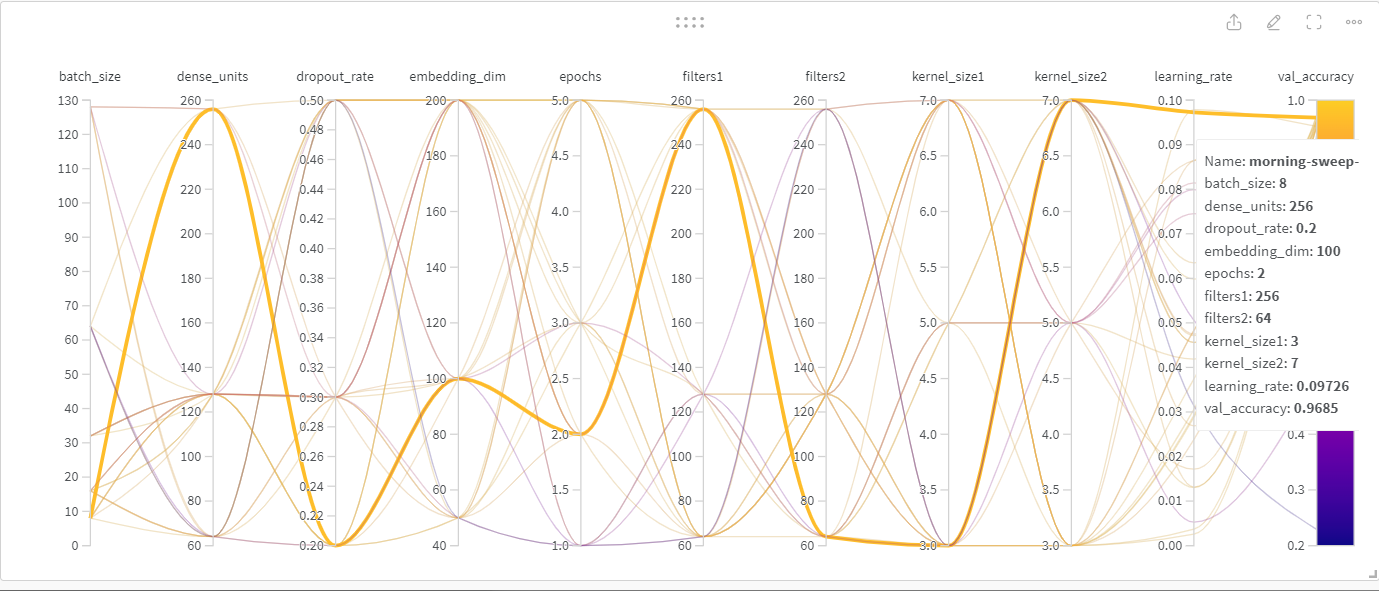